In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os 
import glob
import random
import numpy as np
import IPython

In [2]:
audio = "./data/blues.00001.wav"
data, sr = librosa.load(audio, sr=22050)

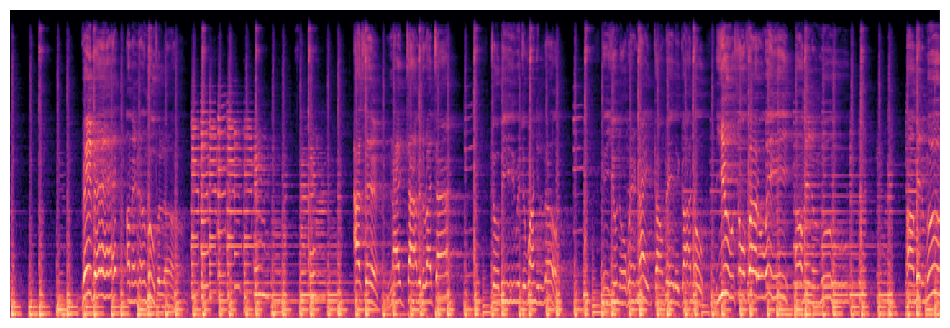

In [3]:
# STFT 계산
stft = librosa.stft(data)
mel_spec = librosa.feature.melspectrogram(S=abs(stft))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/mel_spec_original.png", bbox_inches='tight', pad_inches=0)

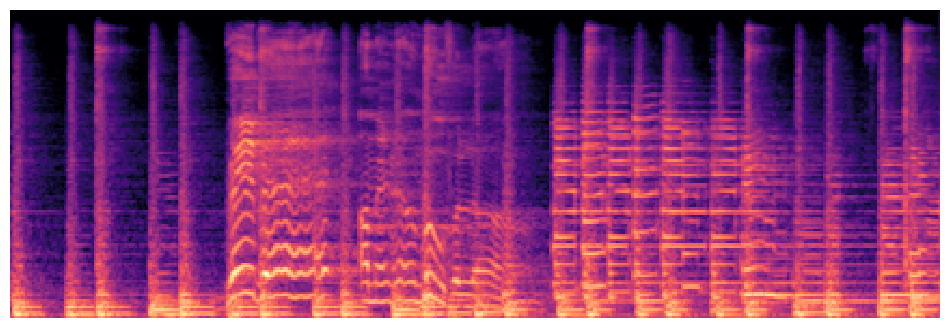

In [4]:
start_time = 0 
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_selection_stft = data[start_sample : end_sample]

# 0초 ~ 10초 구간 STFT 계산
stft_temp = librosa.stft(data_selection_stft)

# 멜 스펙트로그램 계산
mel_spec_temp = librosa.feature.melspectrogram(S=abs(stft_temp))

# STFT -> db로 변환
mel_spec_db_temp = librosa.amplitude_to_db(mel_spec_temp, ref=np.max)

# STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db_temp, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/mel_spec_0-10.png", bbox_inches='tight', pad_inches=0)

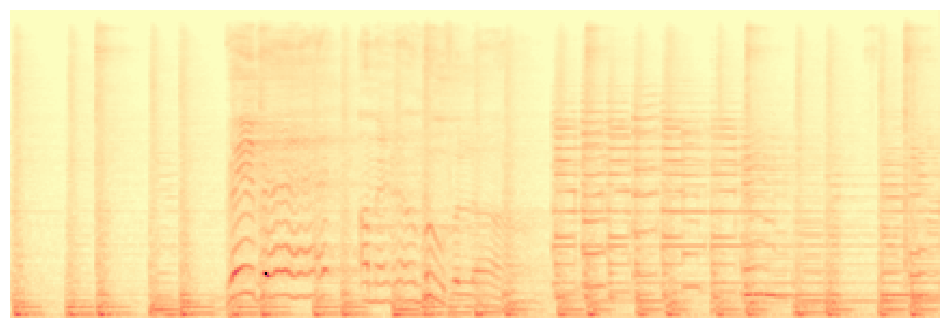

In [5]:
# STFT 계산
stft = librosa.stft(data_selection_stft)

# 멜 스펙트로그램 계산
mel_spec = librosa.feature.melspectrogram(S=abs(stft))

# STFT 결과 -> db로 변환
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 노이즈 추가
noise = 0.005 * np.random.randn(*mel_spec_db.shape)
augmented_spec = mel_spec_db + noise

# 노이즈 추가된 결과 -> db로 변환
augmented_spec_db = librosa.amplitude_to_db(augmented_spec, ref=np.max)

# STFT 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(augmented_spec_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/mel_spec_0-10_aug_noise.png", bbox_inches='tight', pad_inches=0)

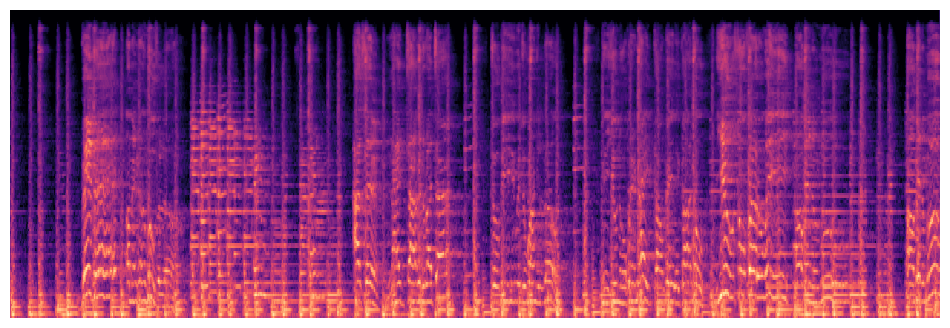

In [6]:
rate = np.random.uniform(low=0.8, high=1.2)
stretched = librosa.effects.time_stretch(data, rate=rate)

# STFT 계산
stft_stretched = librosa.stft(stretched)

# 멜 스펙트로그램 계산
mel_spec_stretched = librosa.feature.melspectrogram(S=abs(stft_stretched))

# STFT 결과 -> db로 변환
stretched_stft_db = librosa.amplitude_to_db(mel_spec_stretched, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(stretched_stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig("./data/mel_spec_0-10_aug_stretch.png", bbox_inches='tight', pad_inches=0)